In [1]:
#IMPORTING LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#IMPORTING DATASET
dataset = pd.read_csv('D:/DATASETS/Random/Kyphosis.csv')
dataset

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [3]:
#INITIALISING INDEPENDENT VARIABLE & DEPENDENT VARIABLE
X = dataset.iloc[:, [1,3]].values   
y = dataset.iloc[:, 0].values
print("X{} \n \n ... \n \n y{}".format(X, y))

X[[ 71   5]
 [158  14]
 [128   5]
 [  2   1]
 [  1  15]
 [  1  16]
 [ 61  17]
 [ 37  16]
 [113  16]
 [ 59  12]
 [ 82  14]
 [148  16]
 [ 18   2]
 [  1  12]
 [168  18]
 [  1  16]
 [ 78  15]
 [175  13]
 [ 80  16]
 [ 27   9]
 [ 22  16]
 [105   5]
 [ 96  12]
 [131   3]
 [ 15   2]
 [  9  13]
 [  8   6]
 [100  14]
 [  4  16]
 [151  16]
 [ 31  16]
 [125  11]
 [130  13]
 [112  16]
 [140  11]
 [ 93  16]
 [  1   9]
 [ 52   6]
 [ 20   9]
 [ 91  12]
 [ 73   1]
 [ 35  13]
 [143   3]
 [ 61   1]
 [ 97  16]
 [139  10]
 [136  15]
 [131  13]
 [121   3]
 [177  14]
 [ 68  10]
 [  9  17]
 [139   6]
 [  2  17]
 [140  15]
 [ 72  15]
 [  2  13]
 [120   8]
 [ 51   9]
 [102  13]
 [130   1]
 [114   8]
 [ 81   1]
 [118  16]
 [118  16]
 [ 17  10]
 [195  17]
 [159  13]
 [ 18  11]
 [ 15  16]
 [158  14]
 [127  12]
 [ 87  16]
 [206  10]
 [ 11  15]
 [178  15]
 [157  13]
 [ 26  13]
 [120  13]
 [ 42   6]
 [ 36  13]] 
 
 ... 
 
 y['absent' 'absent' 'present' 'absent' 'absent' 'absent' 'absent' 'absent'
 'absent' 'present' 

In [4]:
#ENCODING DEPENDENT VARIABLE
from sklearn.preprocessing import LabelEncoder   
le = LabelEncoder()   
y = le.fit_transform(y)
y

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [5]:
#SPLITTING DATA INTO TRAINING AND TESTING SET
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 0)

In [6]:
#FITTING RANDOM FOREST TO TRAINING SET
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [7]:
#PREDICTING TEST SET RESULTS
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0])

In [8]:
#CREATING CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  2],
       [ 2,  3]], dtype=int64)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


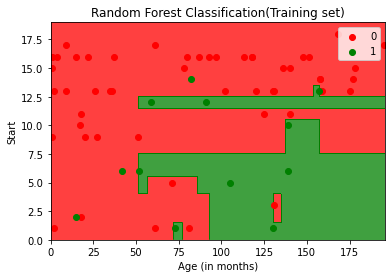

In [9]:
#VISUALIZING TRAINING SET RESULTS
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification(Training set)')
plt.xlabel('Age (in months)')
plt.ylabel('Start')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


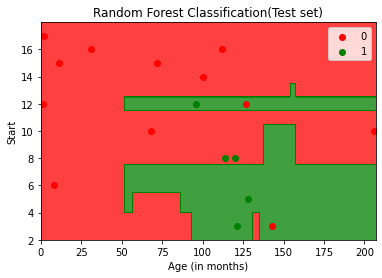

In [10]:
#VISUALIZING TEST SET RESULTS
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification(Test set)')
plt.xlabel('Age (in months)')
plt.ylabel('Start')
plt.legend()
plt.show()

In [11]:
#CALCULATING ACCURACY
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7647058823529411